<a href="https://colab.research.google.com/github/aminfazy/basic_MLDL/blob/main/Feed_forward_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A simple feed forward network for MNIST image classification

In [ ]:
# Import the required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt 

('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))
('Total number of outputs : ', 10)
('Output classes : ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


Text(0.5,1,'Ground Truth : 7')

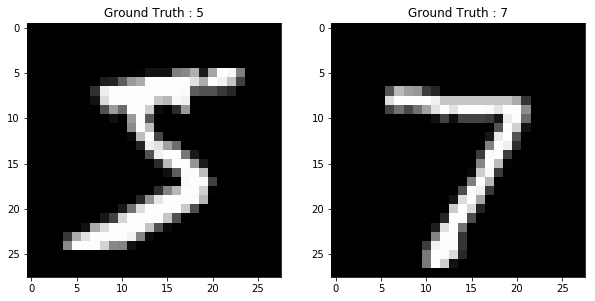

In [ ]:
# Get the training data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784
dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [ ]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
# Define the model
model = Sequential()
# Define the model layers
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 3s 52us/sample - loss: 10.3686 - acc: 0.3551 - val_loss: 9.2910 - val_acc: 0.4227
Epoch 2/20
60000/60000 [==============================] - 3s 48us/sample - loss: 9.5816 - acc: 0.4049 - val_loss: 8.9245 - val_acc: 0.4459
Epoch 3/20
60000/60000 [==============================] - 3s 47us/sample - loss: 9.2533 - acc: 0.4254 - val_loss: 8.9252 - val_acc: 0.4460
Epoch 4/20
60000/60000 [==============================] - 3s 48us/sample - loss: 9.0745 - acc: 0.4365 - val_loss: 8.9363 - val_acc: 0.4453
Epoch 5/20
60000/60000 [==============================] - 3s 49us/sample - loss: 9.1048 - acc: 0.4348 - val_loss: 8.7640 - val_acc: 0.4560
Epoch 6/20
60000/60000 [==============================] - 3s 48us/sample - loss: 8.9988 - acc: 0.4414 - val_loss: 8.7952 - val_acc: 0.4541
Epoch 7/20
60000/60000 [==============================] - 3s 48us/s

## Evaluate the model

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 0s 28us/sample - loss: 8.6974 - acc: 0.4603
Evaluation result on Test Data : Loss = 8.69739753876, accuracy = 0.460299998522


## Run the sample predictions

Model prediction: 2


Text(0.5,1,'Ground Truth : 2')

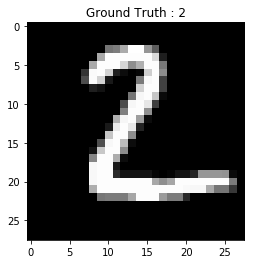

In [ ]:
# Predict the most likely class
print("Model prediction: {}".format(model.predict_classes(test_data[[1],:])[0]))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))

KeyError: 'accuracy'

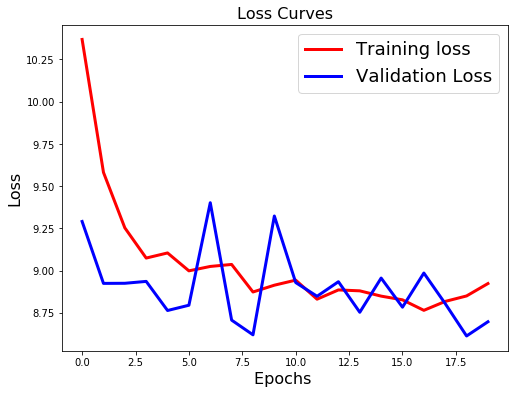

<Figure size 576x432 with 0 Axes>

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)